In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define directories
train_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Wheat\\Train"
test_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Wheat\\Test"
validation_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Wheat\\Validation"


In [3]:
# Define the image size
img_size = (150, 150)
batch_size = 32

# Count the number of classes
num_classes = len(os.listdir(train_dir))

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2847 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [4]:
# MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

mobilenet_evaluation = mobilenet_model.evaluate(test_generator)
print("MobileNet Test Accuracy:", mobilenet_evaluation[1])

Epoch 1/25
89/89 [==============================] - 27s 290ms/step - loss: 0.2725 - accuracy: 0.9171 - val_loss: 0.0376 - val_accuracy: 0.9778
Epoch 2/25
89/89 [==============================] - 23s 261ms/step - loss: 0.0490 - accuracy: 0.9828 - val_loss: 0.0259 - val_accuracy: 0.9778
Epoch 3/25
89/89 [==============================] - 24s 268ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.0342 - val_accuracy: 0.9778
Epoch 4/25
89/89 [==============================] - 23s 263ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0605 - val_accuracy: 0.9778
Epoch 5/25
89/89 [==============================] - 24s 263ms/step - loss: 0.0184 - accuracy: 0.9930 - val_loss: 0.0649 - val_accuracy: 0.9778
Epoch 6/25
89/89 [==============================] - 25s 277ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0263 - val_accuracy: 0.9778
Epoch 7/25
89/89 [==============================] - 24s 270ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0240 - val_accuracy: 0.9778

In [6]:
# CNN Model from Scratch
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

cnn_evaluation = cnn_model.evaluate(test_generator)
print("CNN Test Accuracy:", cnn_evaluation[1])

Epoch 1/25
89/89 [==============================] - 53s 593ms/step - loss: 0.6921 - accuracy: 0.7383 - val_loss: 0.0773 - val_accuracy: 0.9778
Epoch 2/25
89/89 [==============================] - 54s 602ms/step - loss: 0.2351 - accuracy: 0.9118 - val_loss: 0.1020 - val_accuracy: 0.9778
Epoch 3/25
89/89 [==============================] - 59s 666ms/step - loss: 0.2195 - accuracy: 0.9234 - val_loss: 0.0343 - val_accuracy: 0.9778
Epoch 4/25
89/89 [==============================] - 79s 885ms/step - loss: 0.1343 - accuracy: 0.9536 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 5/25
89/89 [==============================] - 82s 916ms/step - loss: 0.0892 - accuracy: 0.9659 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 6/25
89/89 [==============================] - 83s 927ms/step - loss: 0.0536 - accuracy: 0.9796 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/25
89/89 [==============================] - 82s 922ms/step - loss: 0.0471 - accuracy: 0.9842 - val_loss: 0.0017 - val_accuracy: 1.0000

2/2 [==============================] - 2s 114ms/step


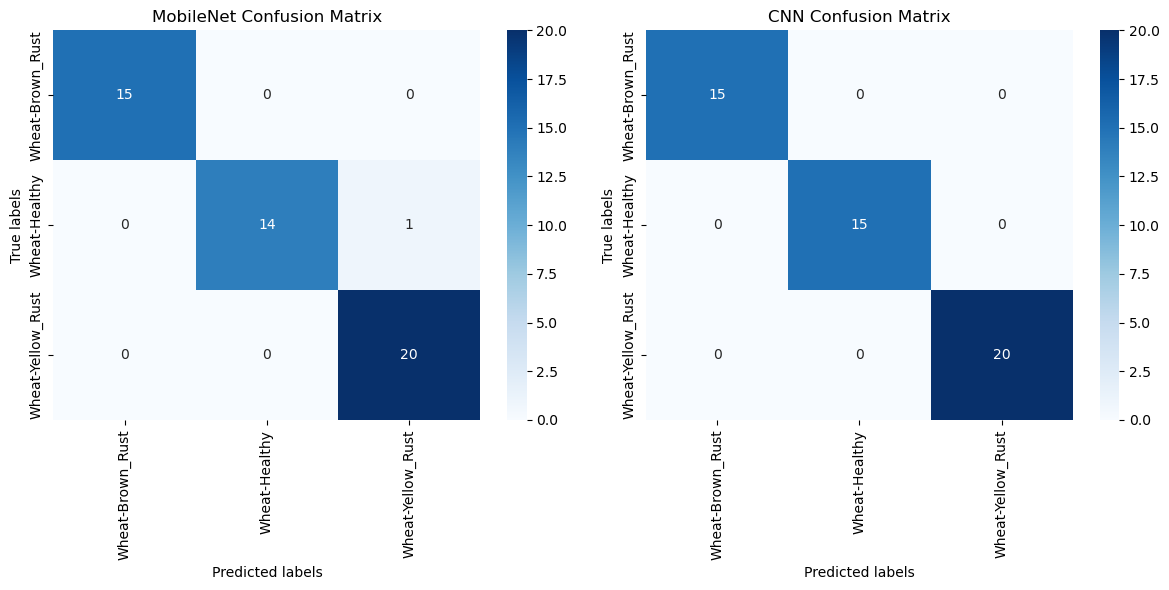

In [7]:
# Confusion matrix for MobileNet
mobilenet_predictions = mobilenet_model.predict(test_generator)
mobilenet_pred_labels = np.argmax(mobilenet_predictions, axis=1)
mobilenet_true_labels = test_generator.classes

mobilenet_conf_matrix = confusion_matrix(mobilenet_true_labels, mobilenet_pred_labels)

# Confusion matrix for CNN from scratch
cnn_predictions = cnn_model.predict(test_generator)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

cnn_conf_matrix = confusion_matrix(mobilenet_true_labels, cnn_pred_labels)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mobilenet_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()


In [8]:
# Print the summary of the CNN model
print(cnn_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0